In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,classification_report

Using TensorFlow backend.


In [2]:
df=pd.read_csv("Imputed.csv")

In [3]:
df

,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_<1.0>,...,YBL_<13.0>,YBL_<14.0>,YBL_<15.0>,YBL_<16.0>,YBL_<17.0>,YBL_<18.0>,YBL_<19.0>,YBL_<20.0>,YBL_<21.0>,YBL_<22.0>
0,47900.0,1042.0,3108,4,3.0,890.0,6.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2501,2,3.0,600.0,6.0,35000.0,525.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,3502,1,0.0,890.0,1.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,3526,2,2.0,890.0,5.0,165000.0,3650.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,1204,3,2.0,20.0,4.0,140.0,525.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,3208,1,4.0,0.0,11.0,150000.0,6500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,3208,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2601,2,3.0,550.0,6.0,145000.0,5750.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,3407,2,4.0,990.0,10.0,500000.0,11500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X=df.drop("HINCP_x",axis=1)
y=df["HINCP_x"]

In [5]:
y=np.reshape(y.values,(-1,1))

In [6]:
ss=StandardScaler()
ssy=StandardScaler()
min_max=MinMaxScaler()
min_maxy=MinMaxScaler()



In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=2020)

In [17]:
X_train_ss=ss.fit_transform(X_train)
y_train_ss=ssy.fit_transform(y_train)


In [9]:
# X_train_mm=min_max.fit_transform(X_train)
# y_train_mm=min_maxy.fit(y_train)


In [13]:
model=Sequential()
model.add(Dense(50 ,activation="relu",input_dim=48))
# model.add(Dense(25 ,activation="relu"))
# model.add(Dense(25 ,activation="relu"))
model.add(Dense(25 ,activation="relu"))
model.add(Dense(1, ))#activation='linear'))
model.compile(loss='mse',optimizer="sgd",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae"])
# add Dropouts layers when overfitting
#SS helps with outliers
#add in l1

# ,input_shape=(8,)

In [18]:
model2=Sequential()
model2.add(Dense(50 ,activation="relu",input_dim=48))
# model.add(Dense(25 ,activation="relu"))
# model.add(Dense(25 ,activation="relu"))
model2.add(Dense(25 ,activation="relu"))
model2.add(Dense(1, ))#activation='linear'))
model2.compile(loss='mse',optimizer="sgd",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae"])
# add Dropouts layers when overfitting
#SS helps with outliers
#add in l1

# ,input_shape=(8,)

In [14]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
#                            mode='auto')
# callbacks_list = [early_stop]
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                2450      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 26        
Total params: 3,751
Trainable params: 3,751
Non-trainable params: 0
_________________________________________________________________


In [16]:
history=model.fit(X_train_ss,y_train,epochs=50,batch_size=50,validation_split=.2)#callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/50
157760/157760 [==============================] - 6s 36us/step - loss: 8657079185.9797 - root_mean_squared_error: 998147200.0000 - mae: 58090.2617 - val_loss: 9135560066.5216 - val_root_mean_squared_error: 911054464.0000 - val_mae: 58780.5430
Epoch 2/50
157760/157760 [==============================] - 6s 38us/step - loss: 8656520519.6187 - root_mean_squared_error: 846335616.0000 - mae: 58079.2930 - val_loss: 9136861323.0115 - val_root_mean_squared_error: 791674688.0000 - val_mae: 58647.6914
Epoch 3/50
157760/157760 [==============================] - 5s 34us/step - loss: 8656030192.6004 - root_mean_squared_error: 747911232.0000 - mae: 58082.8672 - val_loss: 9144409514.5563 - val_root_mean_squared_error: 709550208.0000 - val_mae: 58208.9766
Epoch 4/50
157760/157760 [==============================] - 5s 32us/step - loss: 8656600107.1481 - root_mean_squared_error: 677440192.0000 - mae: 58064.4492 - val_loss: 9135688195.7062 - val

In [19]:
history2=model2.fit(X_train_ss,y_train_ss,epochs=50,batch_size=50,validation_split=.2)#callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/50
157760/157760 [==============================] - 6s 35us/step - loss: 0.6284 - root_mean_squared_error: 0.8061 - mae: 0.4660 - val_loss: 0.6451 - val_root_mean_squared_error: 0.7941 - val_mae: 0.4530
Epoch 2/50
157760/157760 [==============================] - 6s 35us/step - loss: 0.6035 - root_mean_squared_error: 0.7903 - mae: 0.4488 - val_loss: 0.6366 - val_root_mean_squared_error: 0.7877 - val_mae: 0.4529
Epoch 3/50
157760/157760 [==============================] - 6s 41us/step - loss: 0.5948 - root_mean_squared_error: 0.7847 - mae: 0.4451 - val_loss: 0.6352 - val_root_mean_squared_error: 0.7839 - val_mae: 0.4422
Epoch 4/50
157760/157760 [==============================] - 6s 40us/step - loss: 0.5907 - root_mean_squared_error: 0.7823 - mae: 0.4427 - val_loss: 0.6288 - val_root_mean_squared_error: 0.7813 - val_mae: 0.4440
Epoch 5/50
157760/157760 [==============================] - 5s 34us/step - loss: 0.5870 - root_mean_squar

In [56]:
min_maxy.inverse_transform([[.0022]])

array([[-7521.16]])

In [57]:
min_maxy.inverse_transform([[.0020]])

array([[-7855.6]])

In [60]:
(0.0019)**.5

0.04358898943540673

In [33]:
ssy.inverse_transform([.6009])

array([142854.86490422])

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'loss', 'root_mean_squared_error', 'mae'])


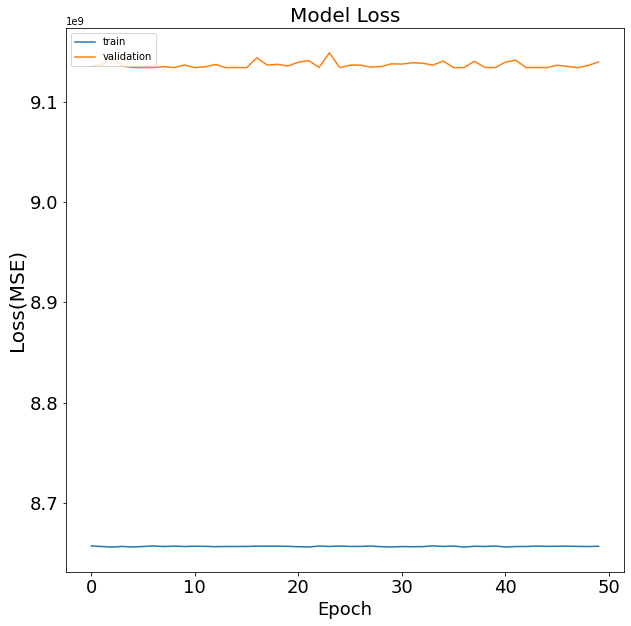

In [20]:
print(history.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
plt.savefig("model results",transparent=True,bbox_inches="tight",)
plt.show();

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'loss', 'root_mean_squared_error', 'mae'])


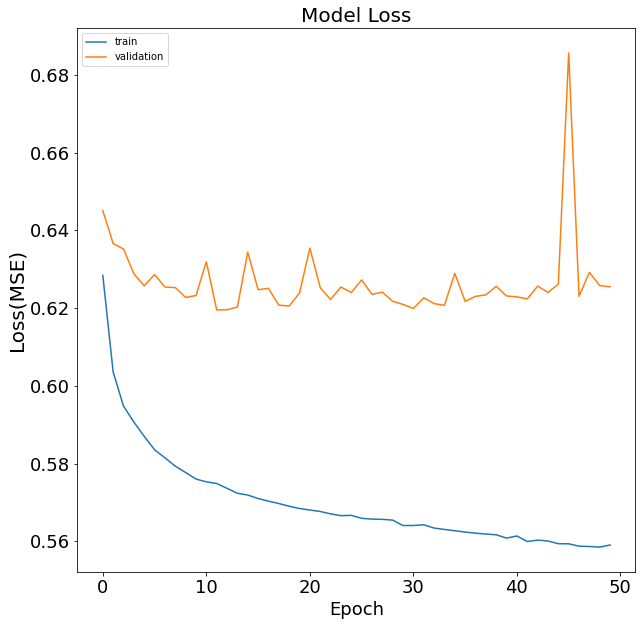

In [21]:
print(history2.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
plt.savefig("model results",transparent=True,bbox_inches="tight",)
plt.show();

In [60]:
y_test

array([[35000.],
       [55100.],
       [69100.],
       ...,
       [88400.],
       [75100.],
       [ 4980.]])

In [27]:
# y_test_ss=ss.transform(y_test)
# X_test_ss=ss.transform(X_test)
y_test_mm=min_maxy.transform(y_test)
X_test_mm=min_max.transform(X_test)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [28]:
y_hat=model.predict(X_test_ss)

In [62]:
y_hat

array([[0.03756016],
       [0.05570848],
       [0.04519601],
       ...,
       [0.04217846],
       [0.067249  ],
       [0.01736517]], dtype=float32)

In [29]:
# y_test_mm=min_max.inverse_transform(y)
#invert normalize
# X_test_mm=min_max.inverse_transform(X_test_mm)
y_hat=ssy.inverse_transform(y_hat)
# X_test_ss=ss.inverse_transform(X_test_ss)
print("X inputs=%s ,Actual=%s, Predictied=%s" % (X_test.values[0],y_test[0],y_hat[0]))
# print(y_hat[0:20])
# mae=avergae diff between predicted and actual

X inputs=[1.042e+03 3.529e+03 2.000e+00 2.000e+00 8.900e+02 4.000e+00 1.650e+05
 3.650e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00] ,Actual=[35000.], Predictied=[7.9521147e+09]


In [65]:
X_test

,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT
238940,260.0,3529,2,2.0,260.0,4.0,260.0,260.0
88724,1965.0,3525,1,1.0,300.0,3.0,240000.0,2950.0
213889,434.0,2200,3,4.0,0.0,9.0,100000.0,1850.0
156991,2867.0,3504,7,3.0,2000.0,7.0,350000.0,8500.0
183801,1275.0,3503,2,1.0,1200.0,3.0,250000.0,425.0
...,...,...,...,...,...,...,...,...
147745,748.0,2501,2,2.0,600.0,4.0,40000.0,1650.0
49390,216.0,2200,1,3.0,750.0,8.0,50000.0,0.0
201663,530.0,2300,2,3.0,870.0,5.0,185000.0,2950.0
34087,1361.0,104,3,3.0,0.0,5.0,170000.0,3650.0


In [23]:
y_test_ss=ssy.transform(y_test)
X_test_ss=ss.transform(X_test)
# y_test_mm=min_maxy.transform(y_test)
# X_test_mm=min_max.transform(X_test)

In [38]:
y_hat2=model2.predict(X_test_ss)

In [39]:
# y_test_mm=min_max.inverse_transform(y)
#invert normalize
# X_test_mm=min_max.inverse_transform(X_test_mm)
y_hat=ssy.inverse_transform(y_hat)
# X_test_ss=ss.inverse_transform(X_test_ss)
print("X inputs=%s ,Actual=%s, Predictied=%s" % (X_test.values[0],y_test[0],y_hat[0]))
# print(y_hat[0:20])
# mae=avergae diff between predicted and actual

X inputs=[1.042e+03 3.529e+03 2.000e+00 2.000e+00 8.900e+02 4.000e+00 1.650e+05
 3.650e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00] ,Actual=[35000.], Predictied=[5.6963573e+34]


In [116]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
#                            mode='auto')
# callbacks_list = [early_stop]
# history_es = model_es.fit(X_train_s, np.array(y_train),
#                           validation_data=(X_test_s, np.array(y_test)),
#                          epochs=40, batch_size=None, callbacks=callbacks_list)